In [2]:
import pandas as pd

df = pd.read_csv("c:/data/titanic/train3.csv")
df.head()

,Survived,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
0,0,0,0,1,1,0,22.0,1,0,7.2500
1,1,1,0,0,0,1,38.0,1,0,71.2833
2,1,0,0,1,0,1,26.0,0,0,7.9250
3,1,1,0,0,0,1,35.0,1,0,53.1000
4,0,0,0,1,1,0,35.0,0,0,8.0500


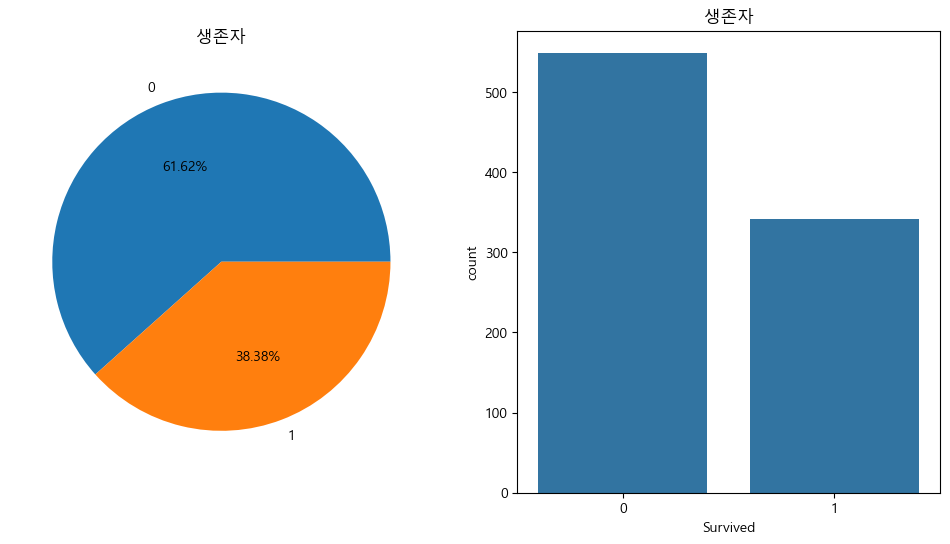

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

# 한글 폰트설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc("font", family=font_name)

f, ax = plt.subplots(1, 2, figsize=(12, 6))
df["Survived"].value_counts().plot.pie(autopct="%1.2f%%", ax=ax[0])
ax[0].set_title("생존자")
ax[0].set_ylabel("")
sns.countplot(x="Survived", data=df, ax=ax[1])
ax[1].set_title("생존자")
plt.show()

<Axes: >

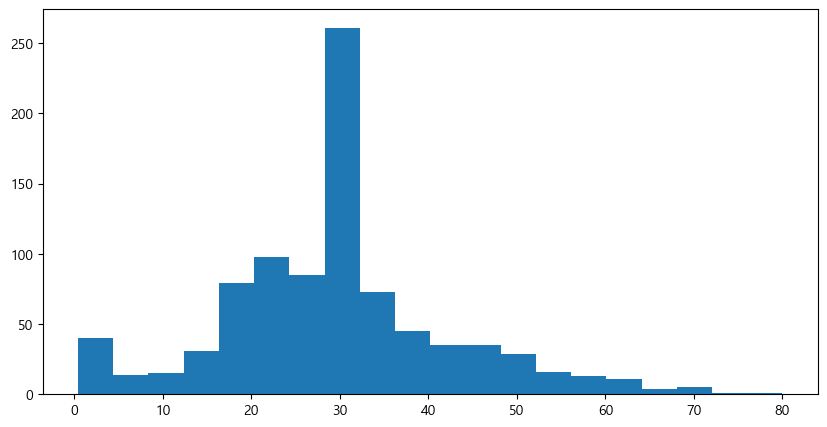

In [4]:
# 승객의 연령분포
df["Age"].hist(bins=20, figsize=(10, 5), grid=False)

In [5]:
# 객실등급별 통계
df.groupby("Pclass1").mean()  # 1등석

,Survived,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
Pclass1,,,,,,,,,
0,0.305185,0.272593,0.727407,0.674074,0.325926,27.412963,0.557037,0.389630,15.580055
1,0.629630,0.000000,0.000000,0.564815,0.435185,37.089907,0.416667,0.356481,84.154687


In [6]:
df.groupby("Pclass2").mean()  # 2등석

,Survived,Pclass1,Pclass3,male,female,Age,SibSp,Parch,Fare
Pclass2,,,,,,,,,
0,0.360679,0.305516,0.694484,0.663366,0.336634,29.726082,0.554455,0.381895,35.208073
1,0.472826,0.000000,0.000000,0.586957,0.413043,29.884946,0.402174,0.380435,20.662183


In [7]:
df.groupby("Pclass3").mean()  # 3등석

,Survived,Pclass1,Pclass2,male,female,Age,SibSp,Parch,Fare
Pclass3,,,,,,,,,
0,0.557500,0.54,0.46,0.575000,0.425000,33.775625,0.410000,0.367500,54.948135
1,0.242363,0.00,0.00,0.706721,0.293279,26.486599,0.615071,0.393075,13.675550


In [8]:
# 상관관계 분석
print(df.corr())

          Survived   Pclass1   Pclass2   Pclass3      male    female  \
Survived  1.000000  0.285904  0.093349 -0.322308 -0.543351  0.543351   
Pclass1   0.285904  1.000000 -0.288585 -0.626738 -0.098013  0.098013   
Pclass2   0.093349 -0.288585  1.000000 -0.565210 -0.064746  0.064746   
Pclass3  -0.322308 -0.626738 -0.565210  1.000000  0.137143 -0.137143   
male     -0.543351 -0.098013 -0.064746  0.137143  1.000000 -1.000000   
female    0.543351  0.098013  0.064746 -0.137143 -1.000000  1.000000   
Age      -0.070657  0.319120  0.004949 -0.278983  0.084660 -0.084660   
SibSp    -0.035322 -0.054582 -0.055932  0.092548 -0.114631  0.114631   
Parch     0.081629 -0.017633 -0.000734  0.015790 -0.245489  0.245489   
Fare      0.257307  0.591711 -0.118557 -0.413333 -0.182333  0.182333   

               Age     SibSp     Parch      Fare  
Survived -0.070657 -0.035322  0.081629  0.257307  
Pclass1   0.319120 -0.054582 -0.017633  0.591711  
Pclass2   0.004949 -0.055932 -0.000734 -0.118557  
Pcl

c:\python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


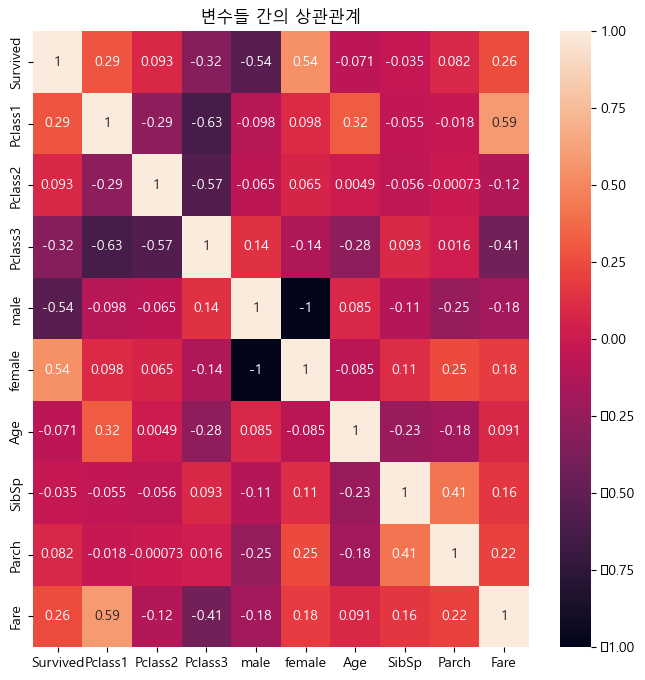

In [9]:
# 상관관계 분석
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, linecolor="white")
plt.title("변수들 간의 상관관계")
plt.show()

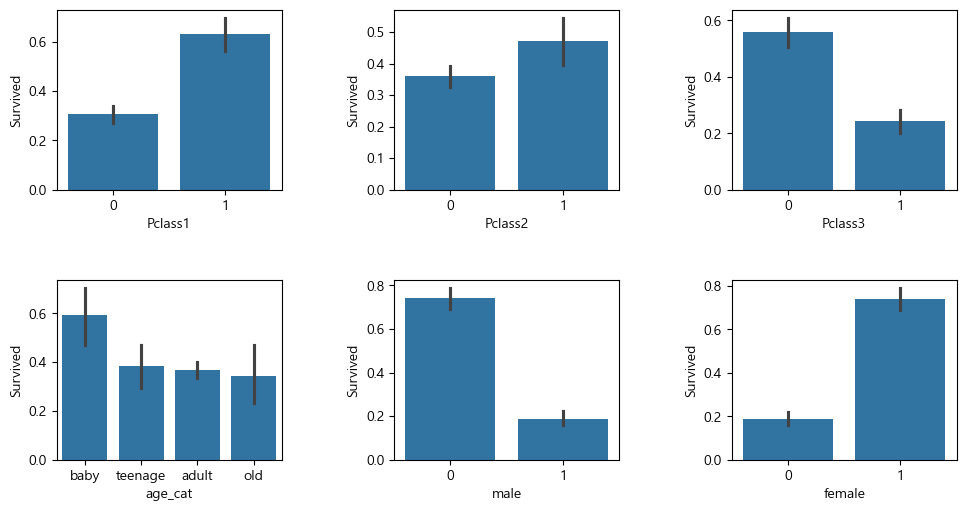

In [10]:
# 연령대를 나눠서 분석
df["age_cat"] = pd.cut(
    df["Age"],
    bins=[0, 10, 20, 50, 100],
    include_lowest=True,
    labels=["baby", "teenage", "adult", "old"],
)
plt.figure(figsize=[10, 5])
plt.subplot(231)

# 막대 위의 세로선은 오차범위를 의미함(기본값은 ci=95)
sns.barplot(x="Pclass1", y="Survived", data=df)
plt.subplot(232)
sns.barplot(x="Pclass2", y="Survived", data=df)
plt.subplot(233)
sns.barplot(x="Pclass3", y="Survived", data=df)
plt.subplot(234)
sns.barplot(x="age_cat", y="Survived", data=df)
plt.subplot(235)
sns.barplot(x="male", y="Survived", data=df)
plt.subplot(236)
sns.barplot(x="female", y="Survived", data=df)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()
# 1등석,2등석인 경우 생존률이 높음, 3등석은 생존률이 낮음
# baby와 female의 생존률이 높음

C:\Users\user\AppData\Local\Temp\ipykernel_16812\2510919449.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(df["Age"][(df["Survived"] == 0)], ax=ax, color="blue", shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_16812\2510919449.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(df["Age"][(df["Survived"] == 1)], ax=g, color="green", shade=True)


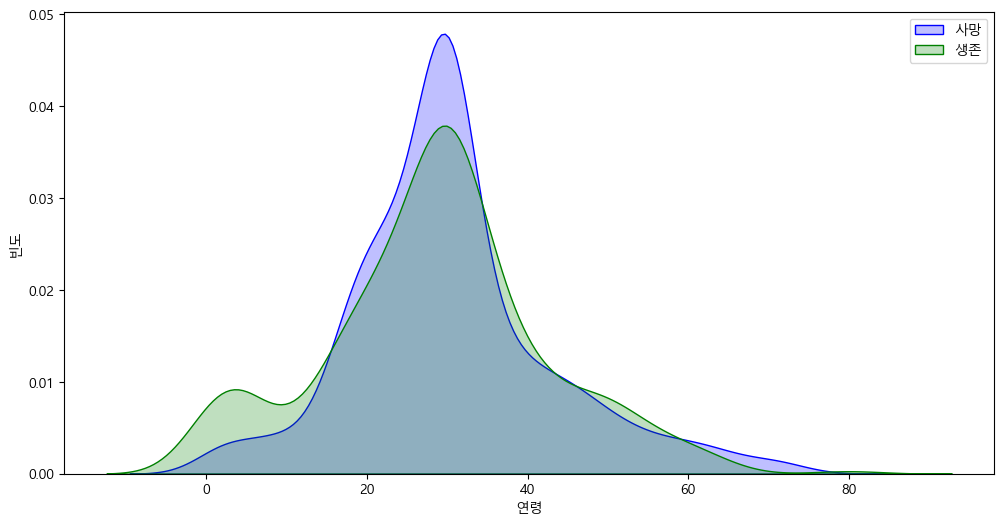

In [11]:
# 나이 분포 곡선(어린아이들의 생존률이 상대적으로 높음)
f, ax = plt.subplots(figsize=(12, 6))

# 커널 밀도(kernel density) 그래프 : 히스토그램보다 부드러운 형태의 분포 곡선
g = sns.kdeplot(df["Age"][(df["Survived"] == 0)], ax=ax, color="blue", shade=True)
g = sns.kdeplot(df["Age"][(df["Survived"] == 1)], ax=g, color="green", shade=True)

g.set_xlabel("연령")
g.set_ylabel("빈도")

g.legend(["사망", "생존"])

In [12]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [13]:
train_cols = df.columns[1:-1]
X = df[train_cols]
y = df["Survived"]

In [14]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=["Survived"])

df_samp = pd.concat([X_samp, y_samp], axis=1)

In [15]:
X = X_samp[train_cols] # 독립변수
y = y_samp["Survived"]

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=7
)

In [17]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, input_shape=(len(X_train.columns),), activation='relu'))
#                       입력노드            9
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

c:\python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,761 (53.75 KB)

 Trainable params: 13,761 (53.75 KB)

 Non-trainable params: 0 (0.00 B)

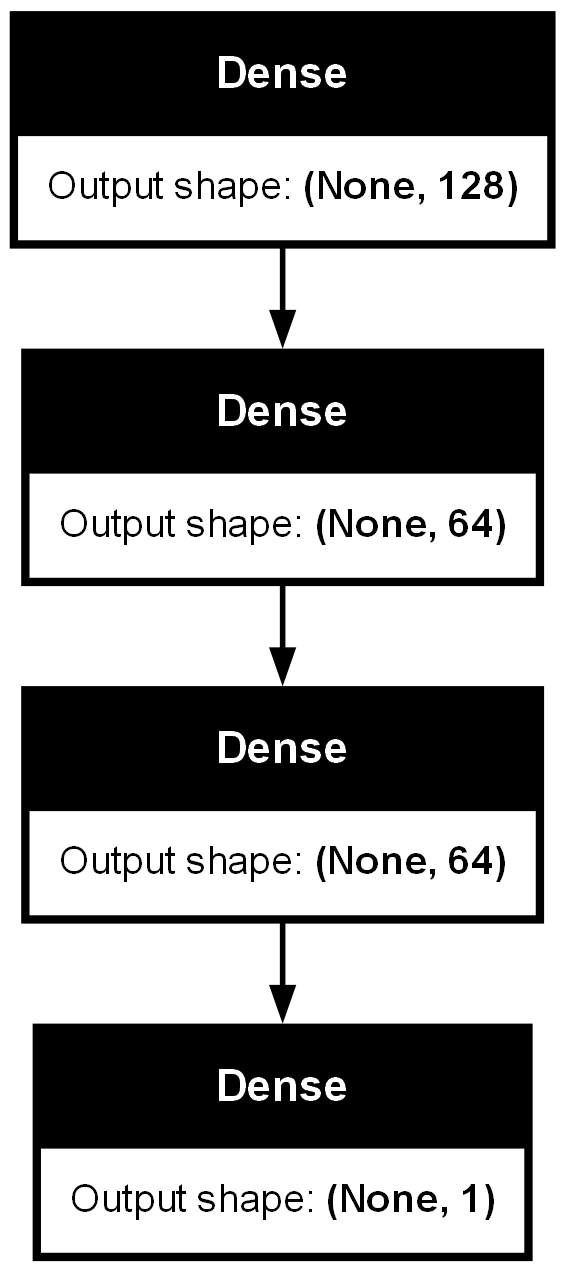

In [19]:
from keras.utils import plot_model

plot_model(model, show_shapes=True)

<Axes: >

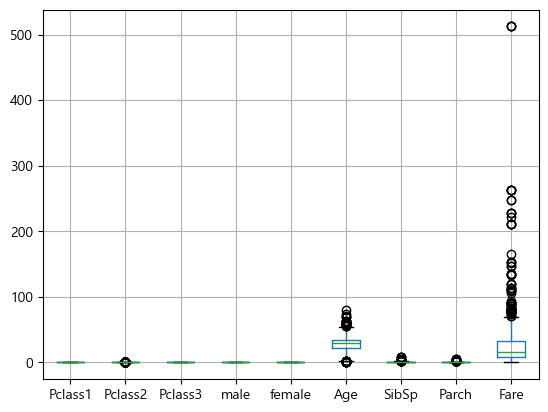

In [20]:
X_train.boxplot()

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # 평균 0, 표준편차 1
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 넘파이 배열로 바뀜
# 넘파이 배열 => 데이터프레임
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

<Axes: >

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


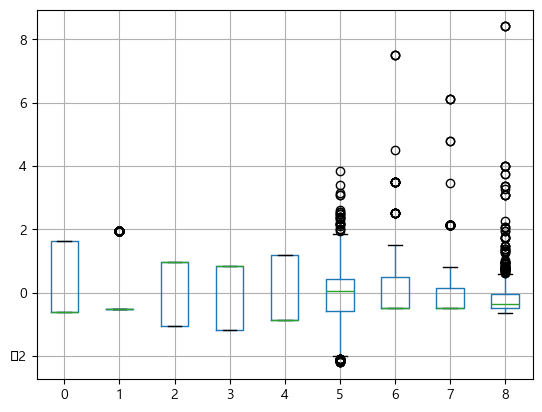

In [22]:
X_train_scaled.boxplot()

In [23]:
from joblib import dump

dump(scaler, "c:/data/titanic/scaler.model", compress=True)

['c:/data/titanic/scaler.model']

Epoch 1/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.7087 - loss: 0.2215
Epoch 2/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.7523 - loss: 0.1637
Epoch 3/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.7928 - loss: 0.1473
Epoch 4/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.8150 - loss: 0.1307
Epoch 5/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.8065 - loss: 0.1396
Epoch 6/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.8400 - loss: 0.1287
Epoch 7/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.8236 - loss: 0.1341
Epoch 8/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.8410 - loss: 0.1227
Epoch 9/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.8352 - loss: 0.1286
Epoch 10/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.8103 - loss: 0.1411
Epoch 11/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.8272 - loss: 0.1298
Epoch 12/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0

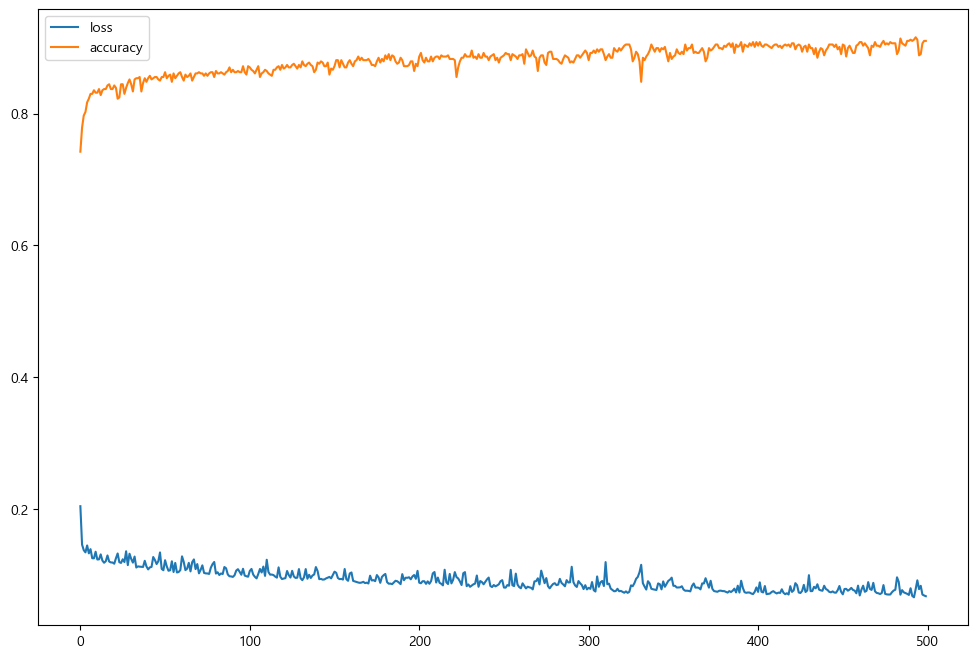

In [24]:
# 모델 학습
hist = model.fit(X_train_scaled, y_train, epochs=500)

plt.figure(figsize=(12, 8))
plt.plot(hist.history["loss"])
plt.plot(hist.history["accuracy"])
plt.legend(["loss", "accuracy"])

plt.show()

In [25]:
# 7. 모델 평가
scores = model.evaluate(X_train_scaled, y_train, verbose=1)

print(scores)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))  # 학습용

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.9120 - loss: 0.0709
[0.06354853510856628, 0.9159049391746521]
compile_metrics: 91.59%


In [26]:
scores = model.evaluate(X_test_scaled, y_test, verbose=1)

print(scores)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))  # 검증용

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.7647 - loss: 0.1834
[0.20443007349967957, 0.7445255517959595]
compile_metrics: 74.45%


In [27]:
# 1등석, 2등석, 3등석, 남성여부, 여성여부, 나이, 형제자매, 부모자녀, 요금

# 3등석, 남성, 19세, 형제자매2, 부모자녀0, 요금50
person1 = [[0, 0, 1, 1, 0, 19, 2, 0, 50]]

# 1등석, 여성, 17세, 형제자매0, 부모자녀2, 요금30
person2 = [[1, 0, 0, 0, 1, 17, 0, 2, 30]]

# 2등석, 여성, 40세, 형제자매1, 부모자녀1, 요금70
person3 = [[0, 1, 0, 0, 1, 40, 1, 1, 70]]

# 스케일링을 해야 할 경우
person1 = scaler.transform(person1)
person2 = scaler.transform(person2)
person3 = scaler.transform(person3)

print(model.predict(person1))
print(model.predict(person2))
print(model.predict(person3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.00087008]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[[1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[[1.]]


c:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [28]:
# 모형을 지정한 디렉토리에 저장

model.save("c:/data/titanic/titanic.keras")

In [29]:
# netron 다운로드 및 테스트
# https://github.com/lutzroeder/netron